In [1]:
from qiskit import QuantumCircuit, transpile, Aer
import qiskit.quantum_info as qi

import utilities_multiples as ut_multiples
import multiples_functions as mult
import oracle_less_than as oracles

import matplotlib.pyplot as plt

import numpy as np
import os

In [2]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=20)

# Multiples of 5 less than 14 with 5 qubits

In [3]:
k = 5 # number whose multiples are to be computed
n_k = np.ceil(np.log2(k)).astype(int)

nqubits_input = 5 # number of qubits
N = 2**nqubits_input

m = 14 # number for less than

In [4]:
oracle = oracles.oracle_less_than(number=m, nqubits=nqubits_input, name=' $< %d$ '%m)

In [5]:
oracle.draw()

q_0: ────────────────────────────────────────────────────────
     ┌───┐                                  ┌──────────┐┌───┐
q_1: ┤ X ├──────────────────────────────────┤3         ├┤ X ├
     ├───┤                 ┌──────────┐┌───┐│          │└───┘
q_2: ┤ X ├─────────────────┤2         ├┤ X ├┤2         ├─────
     ├───┤┌──────────┐┌───┐│          │└───┘│   CZ (4) │     
q_3: ┤ X ├┤1         ├┤ X ├┤1  CZ (3) ├─────┤1         ├─────
     ├───┤│   CZ (2) │└───┘│          │     │          │┌───┐
q_4: ┤ X ├┤0         ├─────┤0         ├─────┤0         ├┤ X ├
     └───┘└──────────┘     └──────────┘     └──────────┘└───┘

In [6]:
circuit = mult.oracle_multiples(k=k, nqubits_input=nqubits_input, init_H=True, classic_register=True,
                                oracle=oracle, qubits_oracle=list(range(nqubits_input)),
                                qubits_control=list(range(nqubits_input, nqubits_input + n_k)))

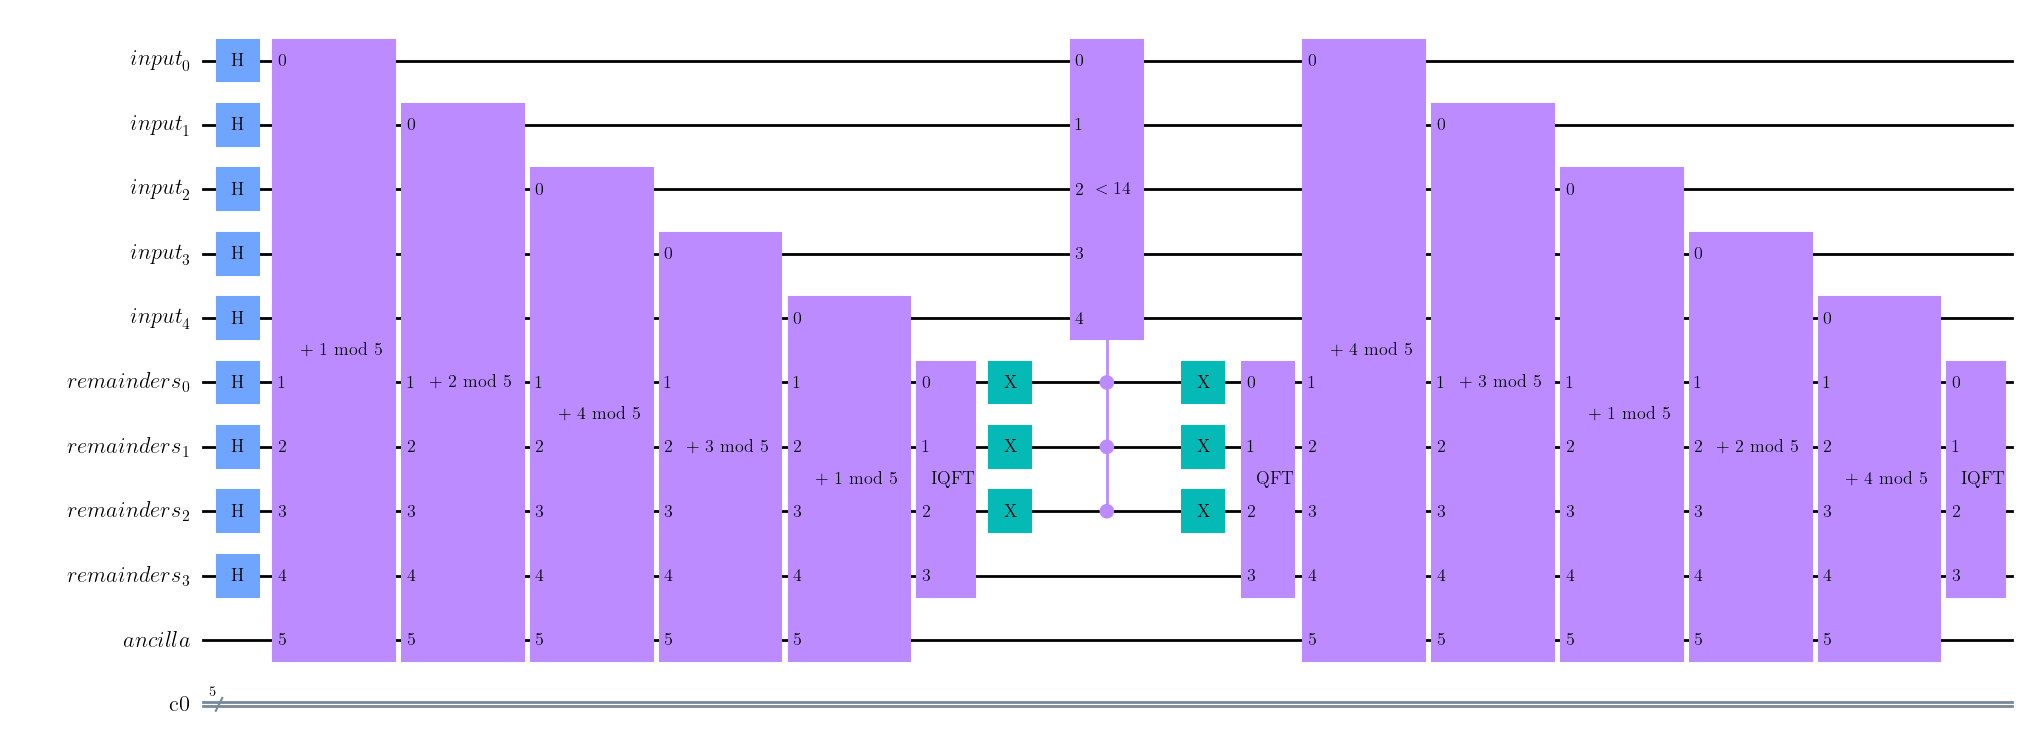

In [7]:
circuit.draw(output='mpl', fold=-1)

In [8]:
circuit.append(ut_multiples.grover_diffuser(nqubits=nqubits_input), range(nqubits_input))

In [9]:
psi = qi.Statevector.from_instruction(circuit)

In [10]:
list(np.asarray(psi))[:20]

[(-0.46403882515366685+1.610145941776152e-16j),
 (-0.11048543456039756+1.5426610412194782e-16j),
 (-0.11048543456039457+1.6036370595921984e-16j),
 (-0.11048543456039708+3.4635644813443784e-17j),
 (-0.11048543456039756+1.186581250254321e-16j),
 (-0.4640388251536662+2.824158609494769e-16j),
 (-0.11048543456039599+2.6084773509478356e-17j),
 (-0.11048543456039764+1.0274744532138647e-16j),
 (-0.11048543456039754-2.6054554786291145e-17j),
 (-0.11048543456039746+4.1965234490336724e-17j),
 (-0.46403882515366557+3.7196554959006017e-16j),
 (-0.11048543456039474-1.278296658246056e-16j),
 (-0.11048543456039746+1.585311059877346e-16j),
 (-0.11048543456039754+1.8864209537884267e-16j),
 (-0.11048543456039765+1.2359488268200612e-16j),
 (-0.11048543456039676-4.3899196843932216e-17j),
 (-0.1104854345603958+1.4565807009707277e-16j),
 (-0.11048543456039589+1.7424077193759494e-16j),
 (-0.1104854345603948+1.413744575060547e-16j),
 (-0.11048543456039756-9.328287953671281e-17j)]

In [11]:
circuit.measure(range(nqubits_input), range(nqubits_input))

# Simulation of circuit

In [12]:
nshots = 20000

In [13]:
backend = Aer.get_backend('aer_simulator_statevector')

qc_transpiled=transpile(circuit, backend=backend)

In [14]:
job= backend.run(qc_transpiled, shots=nshots, memory=True)

In [15]:
result = job.result()

In [16]:
result.get_counts()

{'00101': 4291,
 '01010': 4363,
 '00001': 262,
 '10001': 230,
 '11001': 254,
 '00000': 4312,
 '01101': 243,
 '01111': 228,
 '10010': 242,
 '11110': 273,
 '11011': 214,
 '10101': 248,
 '01000': 259,
 '11010': 222,
 '10100': 239,
 '10000': 257,
 '11100': 243,
 '10011': 244,
 '00100': 227,
 '10111': 238,
 '11000': 244,
 '00111': 234,
 '10110': 254,
 '00110': 246,
 '01110': 237,
 '00011': 232,
 '01011': 255,
 '11111': 234,
 '00010': 250,
 '11101': 247,
 '01001': 249,
 '01100': 229}

# Plots

In [17]:
x_desired = list(range(0, m, k))
x_undesired = [a for a in range(N) if a not in x_desired]

y_desired = [result.get_counts().get(ut_multiples.to_binary(a, nqubits_input), 0) for a in x_desired]
y_undesired = [result.get_counts().get(ut_multiples.to_binary(a, nqubits_input), 0) for a in x_undesired]

#### Information for Plot

In [18]:
xlabel='Numbers'
ylabel='Frequency'

edgecolor='k'

figsize_=(40,10)

legend_names=['Multiples of %d less than %d'%(k, m),'Otherwise']

fontsize=60

# Label and ticks

yticks_size=fontsize-5
xticks_size=fontsize-5

xlabel_size=fontsize
ylabel_size = fontsize

ylabel_position=(-0.065, 0.5)

## Plotting

In [24]:
folder = 'plots_simulations'
filename = 'simulation_%d_K_lessthan_%d_w_%d_qubits.pdf'%(k, m, nqubits_input)

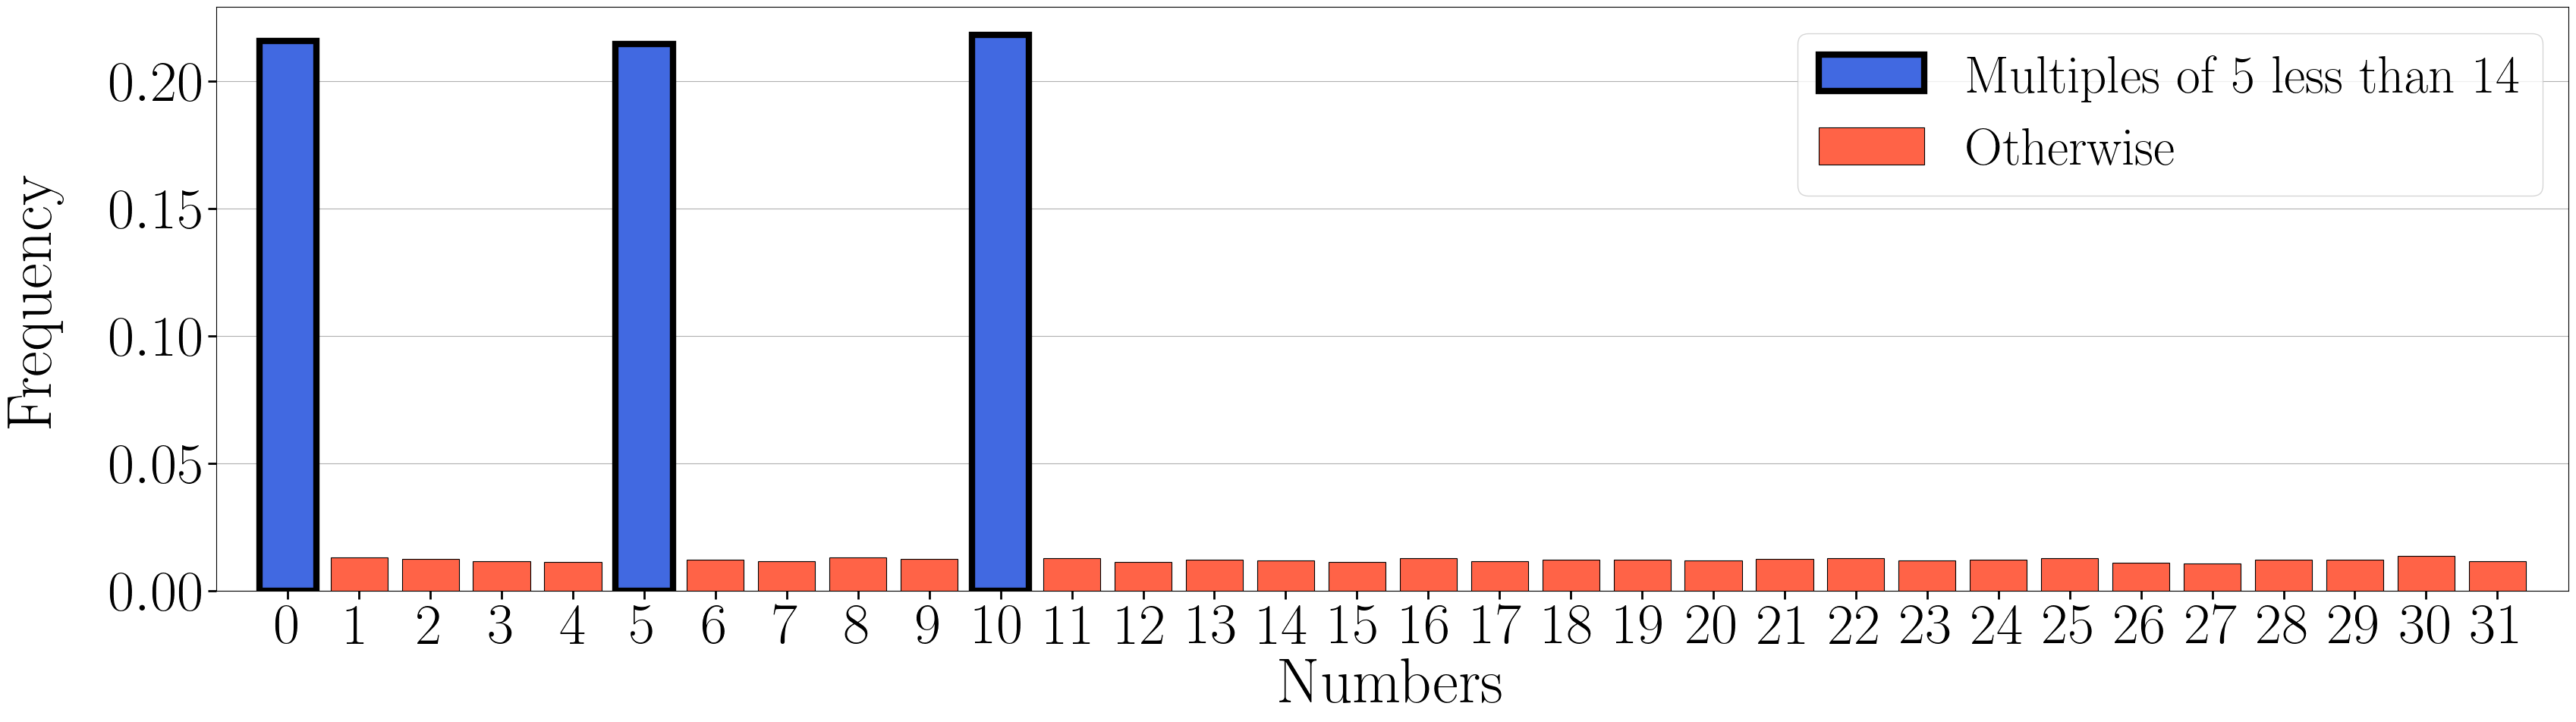

In [25]:
fig, ax = plt.subplots(1, 1, figsize=figsize_)


ax.bar(x_desired, [y_element/nshots for y_element in y_desired], zorder=3,
       edgecolor='k', label=legend_names[0], color = 'royalblue', linewidth=6)
ax.bar(x_undesired, [y_element/nshots for y_element in y_undesired], zorder=3,
       edgecolor='k', label=legend_names[1], color='tomato', linewidth=0.8)

ax.set_xticks(list(range(N)))

ax.tick_params(axis='x', labelsize=xticks_size)
ax.tick_params(axis='y', labelsize=yticks_size)

ax.set_xlabel(xlabel, fontsize=xlabel_size)
ax.set_ylabel(ylabel, fontsize=ylabel_size)


ax.yaxis.set_label_coords(ylabel_position[0], ylabel_position[1])

ax.grid(axis='y', zorder=0)    

ax.legend(fontsize=fontsize-10, loc='upper right')

ax.tick_params(width=2, size=8)

ax.set_xlim([-1, 32])

plt.savefig(fname=os.path.join(os.path.pardir, folder, filename), bbox_inches='tight', dpi=400)

# Natural numbers $n\in\mathbb{N}$ such that $n\equiv 3$ mod $k$

In [23]:
k = 6 # number whose multiples are to be computed
n_k = np.ceil(np.log2(k)).astype(int)

remainder = 3

nqubits_input = 5 # number of qubits
N = 2**nqubits_input

In [24]:
oracle = QuantumCircuit(n_k, name='oracle')
oracle.x(2)
oracle.append(ut_multiples.multi_control_z(n_k).to_gate(), range(n_k))
oracle.x(2)


In [25]:
oracle.draw()

┌──────────┐     
q_0: ─────┤0         ├─────
          │          │     
q_1: ─────┤1  CZ (3) ├─────
     ┌───┐│          │┌───┐
q_2: ┤ X ├┤2         ├┤ X ├
     └───┘└──────────┘└───┘

In [26]:
circuit = mult.oracle_multiples(k=k, nqubits_input=nqubits_input, init_H=True, classic_register=True,
                                oracle=oracle, qubits_oracle=list(range(nqubits_input, nqubits_input + n_k)),
                                state_control=[1, 1, 1])

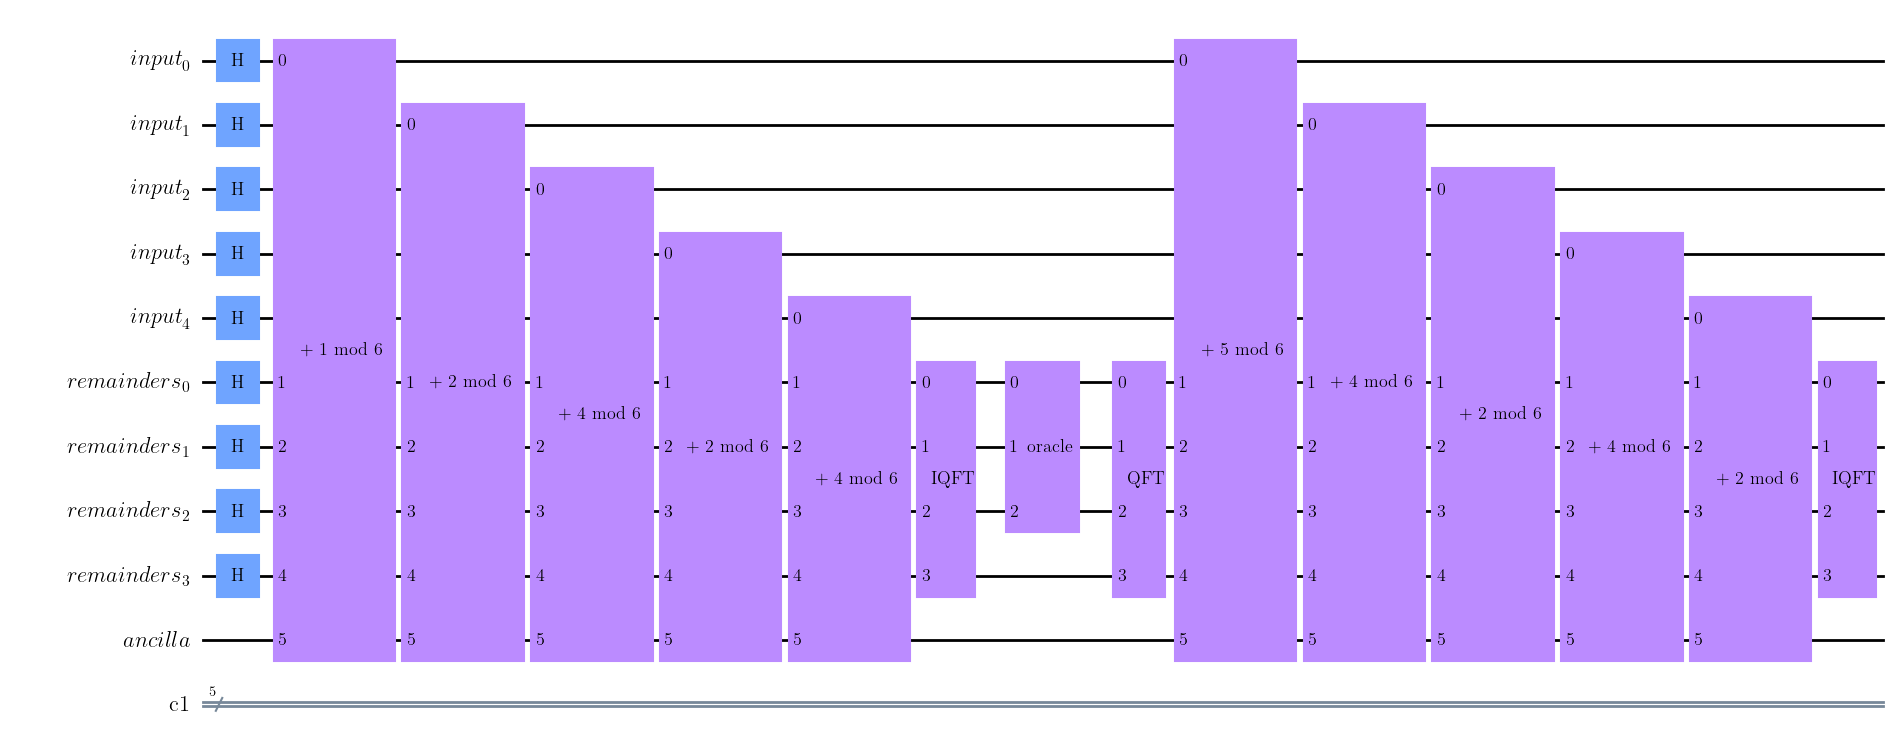

In [27]:
circuit.draw(output='mpl', fold=-1)

In [28]:
circuit.append(ut_multiples.grover_diffuser(nqubits=nqubits_input), range(nqubits_input))

In [29]:
psi = qi.Statevector.from_instruction(circuit)

In [30]:
list(np.asarray(psi))[:20]

[(-0.06629126073623783-1.7629794301458315e-17j),
 (-0.06629126073623787-2.937934653367795e-17j),
 (-0.06629126073623788-3.0208960299062936e-17j),
 (-0.4198446513295063-1.1099599666763105e-17j),
 (-0.06629126073623787-6.902900365475658e-18j),
 (-0.06629126073623781+7.299921333437377e-18j),
 (-0.06629126073623776-4.5842393168432386e-17j),
 (-0.06629126073623769-3.6200171333972775e-18j),
 (-0.06629126073623778+2.470430776505489e-17j),
 (-0.4198446513295062+2.4469707338492603e-17j),
 (-0.06629126073623783+1.5774638435386162e-17j),
 (-0.06629126073623785+2.827558619541544e-17j),
 (-0.06629126073623792+2.190781210211966e-17j),
 (-0.06629126073623785-9.750090538332219e-18j),
 (-0.06629126073623792+4.8010367698642175e-17j),
 (-0.41984465132950627-2.5822316728722042e-17j),
 (-0.06629126073623785-5.891168007410757e-18j),
 (-0.06629126073623778-1.384361349581597e-17j),
 (-0.06629126073623771-2.42005659322736e-19j),
 (-0.06629126073623771-5.852783577163925e-17j)]

In [31]:
circuit.measure(range(nqubits_input), range(nqubits_input))

# Simulation of circuit

In [32]:
nshots = 20000

In [33]:
backend = Aer.get_backend('aer_simulator_statevector')

qc_transpiled=transpile(circuit, backend=backend)

In [34]:
job= backend.run(qc_transpiled, shots=nshots, memory=True)

In [35]:
result = job.result()

In [36]:
result.get_counts()

{'01111': 3590,
 '01010': 98,
 '00001': 82,
 '01001': 3521,
 '11011': 3498,
 '00011': 3456,
 '11110': 87,
 '10101': 3560,
 '11111': 89,
 '01110': 75,
 '11001': 78,
 '10000': 85,
 '00110': 87,
 '01011': 84,
 '00000': 81,
 '10100': 92,
 '11010': 98,
 '01000': 74,
 '10011': 80,
 '00101': 101,
 '10010': 84,
 '11101': 90,
 '00111': 103,
 '11100': 105,
 '10111': 90,
 '10110': 75,
 '11000': 90,
 '00100': 89,
 '01100': 100,
 '01101': 85,
 '00010': 84,
 '10001': 89}

# Plots

In [37]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=20)

In [38]:
x_desired = list(range(remainder, N, k))
x_undesired = [a for a in range(N) if a not in x_desired]

y_desired = [result.get_counts().get(ut_multiples.to_binary(a, nqubits_input), 0) for a in x_desired]
y_undesired = [result.get_counts().get(ut_multiples.to_binary(a, nqubits_input), 0) for a in x_undesired]

#### Information for Plot

In [39]:
xlabel='Numbers'
ylabel='Frequency'

edgecolor='k'

figsize_=(40,10)

legend_names=[r'$n\equiv %d$ mod $%d$'%(remainder, k),'Otherwise']

fontsize=60

# Label and ticks

yticks_size=fontsize-5
xticks_size=fontsize-5

xlabel_size=fontsize
ylabel_size = fontsize

ylabel_position=(-0.04, 0.5)

## Plotting

In [40]:
import matplotlib as mpl

mpl.rcParams.update({'text.usetex': True,
    'text.latex.preamble': r'\usepackage{amsfonts}'})

In [42]:
folder = 'plots_simulations'
filename = 'simulation_n_equiv_%d_mod_%d_w_%d_qubits.pdf'%(remainder, k, nqubits_input)

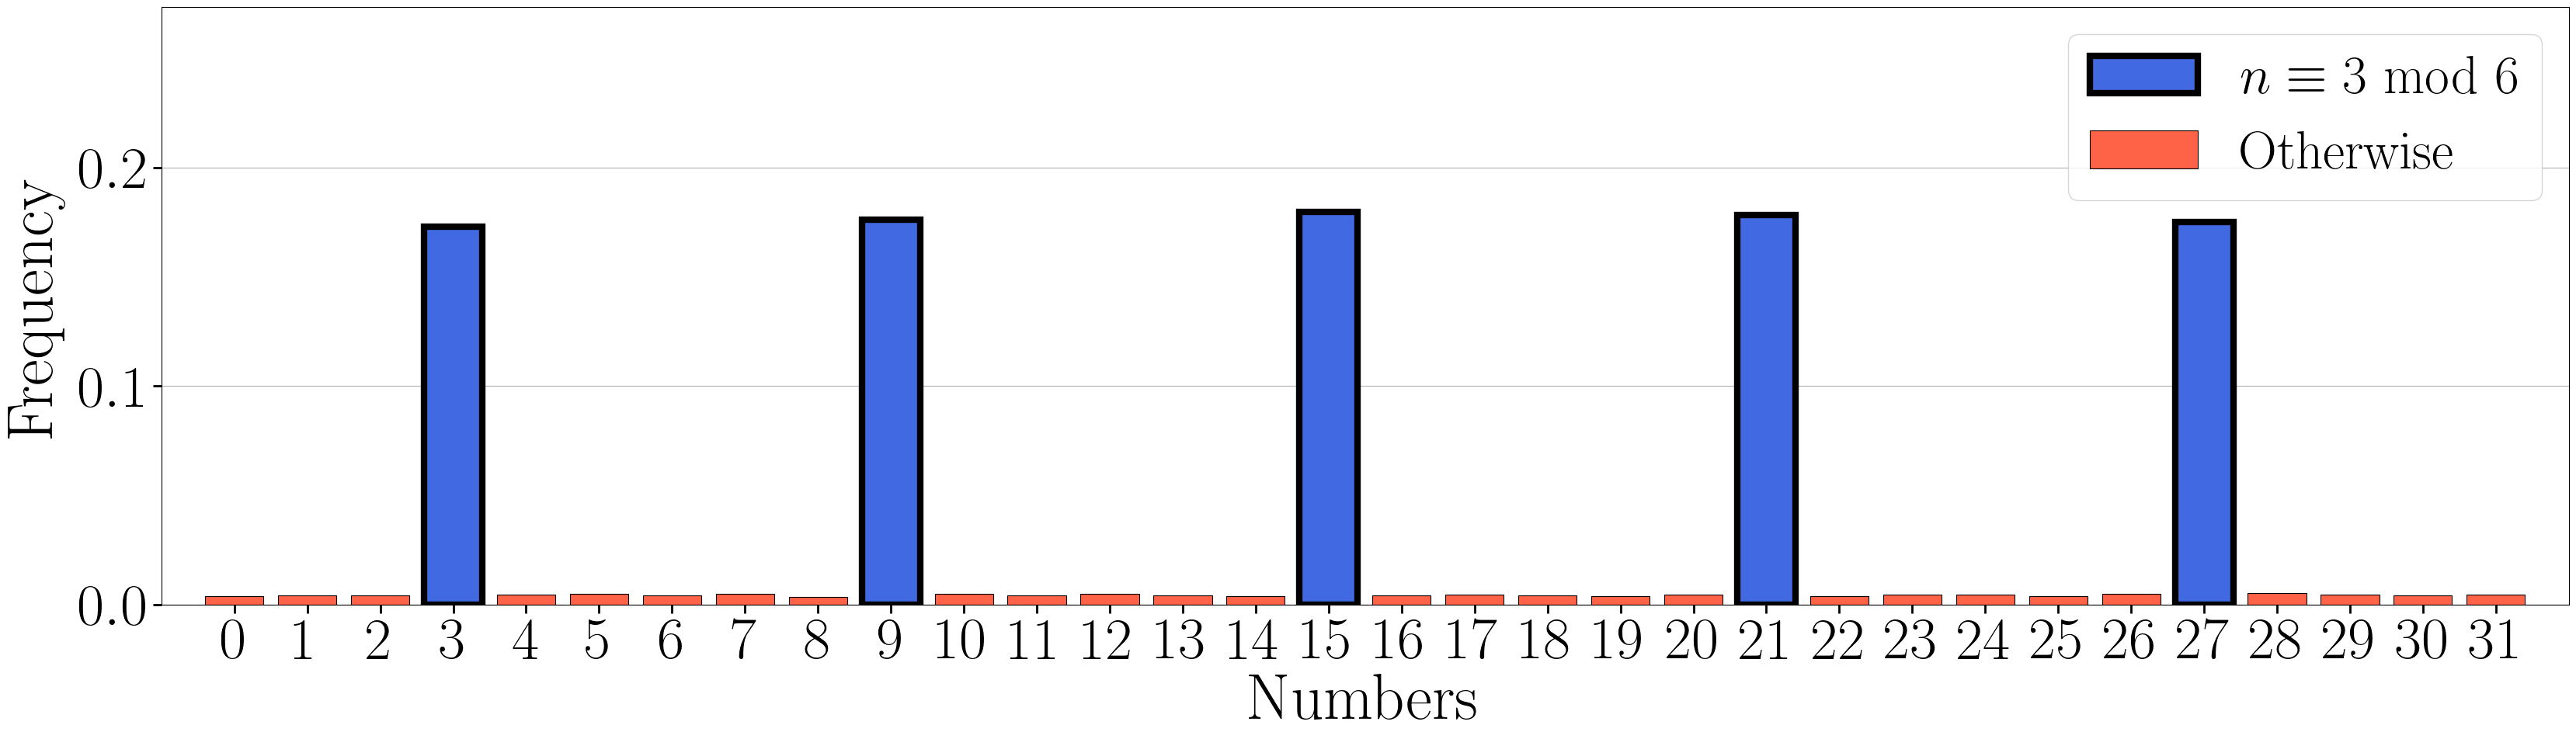

In [43]:
fig, ax = plt.subplots(1, 1, figsize=figsize_)


ax.bar(x_desired, [y_element/nshots for y_element in y_desired], zorder=3,
       edgecolor='k', label=legend_names[0], color = 'royalblue', linewidth=6)
ax.bar(x_undesired, [y_element/nshots for y_element in y_undesired], zorder=3,
       edgecolor='k', label=legend_names[1], color='tomato', linewidth=0.8)

ax.set_xticks(list(range(N)))

ax.tick_params(axis='x', labelsize=xticks_size)
ax.tick_params(axis='y', labelsize=yticks_size)

ax.set_xlabel(xlabel, fontsize=xlabel_size)
ax.set_ylabel(ylabel, fontsize=ylabel_size)


ax.yaxis.set_label_coords(ylabel_position[0], ylabel_position[1])

ax.grid(axis='y', zorder=0)    

ax.legend(fontsize=fontsize-10, loc='upper right')

ax.tick_params(width=2, size=8)

lims = ax.get_ylim()

ax.set_ylim(lims[0], 1.45*lims[1])

ax.set_xlim([-1, 32])

plt.savefig(fname=os.path.join(os.path.pardir, folder, filename), bbox_inches='tight', dpi=400)

# Natural numbers $n\in\mathbb{N}$ such that $n\equiv 5$ mod $9$ en el intervalo $[12, 28]$

In [44]:
k = 9 # number whose multiples are to be computed
n_k = np.ceil(np.log2(k)).astype(int)

nqubits_input = 5 # number of qubits
N = 2**nqubits_input

remainder = 5

a = 12 # low boundary
b = 28 # upper boundary

In [45]:
oracle = QuantumCircuit(nqubits_input, name=' [%d, %d] '%(a, b))

oracle.append(oracles.oracle_less_than(number=a, nqubits=nqubits_input).to_gate(), range(nqubits_input))
oracle.append(oracles.oracle_less_than(number=b+1, nqubits=nqubits_input).to_gate(), range(nqubits_input))

In [46]:
oracle.draw()

┌─────────┐┌─────────┐
q_0: ┤0        ├┤0        ├
     │         ││         │
q_1: ┤1        ├┤1        ├
     │         ││         │
q_2: ┤2  < 12  ├┤2  < 29  ├
     │         ││         │
q_3: ┤3        ├┤3        ├
     │         ││         │
q_4: ┤4        ├┤4        ├
     └─────────┘└─────────┘

In [47]:
state_control = [int(char) for char in ut_multiples.to_binary(remainder, n_k)]

In [48]:
state_control

[0, 1, 0, 1]

In [49]:
circuit = mult.oracle_multiples(k=k, nqubits_input=nqubits_input, init_H=True, classic_register=True,
                                oracle=oracle, qubits_oracle=list(range(nqubits_input)),
                                qubits_control=list(range(nqubits_input, nqubits_input + n_k)),
                                state_control=state_control)

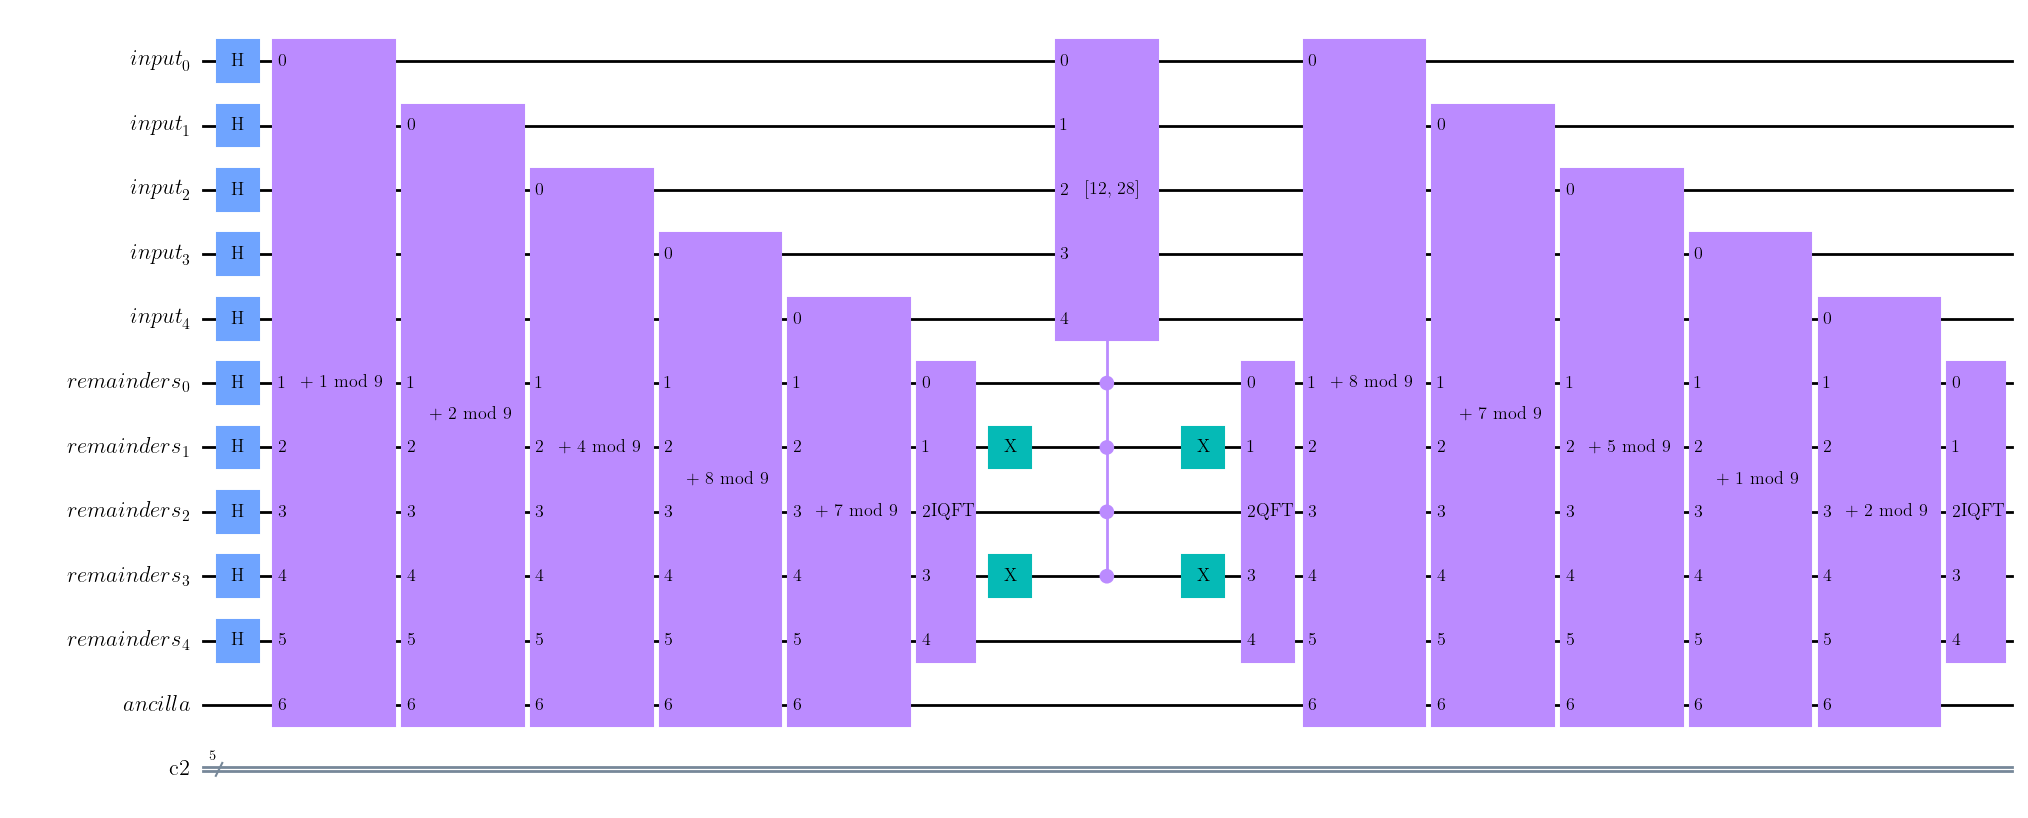

In [50]:
circuit.draw(output='mpl', fold=-1)

In [51]:
circuit.append(ut_multiples.grover_diffuser(nqubits=nqubits_input), range(nqubits_input))

In [52]:
psi = qi.Statevector.from_instruction(circuit)

In [53]:
list(np.asarray(psi))[:20]

[(-0.1325825214724791+4.616767494534303e-18j),
 (-0.13258252147247707-6.46627936495808e-18j),
 (-0.13258252147248295-2.7531327872091907e-16j),
 (-0.1325825214724807-1.0333594410092178e-16j),
 (-0.132582521472476+8.856333645648083e-18j),
 (-0.1325825214724773-3.4094117083638855e-16j),
 (-0.13258252147247712-1.5664842628050668e-16j),
 (-0.13258252147247135+1.8568961598207844e-16j),
 (-0.13258252147248267+3.198381613370215e-16j),
 (-0.1325825214724771-8.227249074969265e-17j),
 (-0.13258252147248245+1.8350207053844652e-16j),
 (-0.13258252147248226+1.6556031359493045e-16j),
 (-0.13258252147247707-1.191345320010244e-16j),
 (-0.13258252147247507-7.25836004347459e-16j),
 (-0.4861359120657543+1.0934928670194273e-15j),
 (-0.132582521472475-3.4893589234533644e-18j),
 (-0.13258252147248248-2.349957574771001e-16j),
 (-0.13258252147247696-5.3725535915629875e-17j),
 (-0.13258252147248223+1.2692856192025294e-16j),
 (-0.13258252147247693-1.9363468901708172e-16j)]

In [54]:
circuit.measure(range(nqubits_input), range(nqubits_input))

# Simulation of circuit

In [55]:
nshots = 20000

In [56]:
backend = Aer.get_backend('aer_simulator_statevector')

qc_transpiled=transpile(circuit, backend=backend)

In [57]:
job= backend.run(qc_transpiled, shots=nshots, memory=True)

In [58]:
result = job.result()

In [59]:
result.get_counts()

{'01110': 4775,
 '11101': 354,
 '00000': 357,
 '11001': 320,
 '10111': 4660,
 '10110': 345,
 '11111': 359,
 '00111': 376,
 '11110': 343,
 '10000': 359,
 '01000': 374,
 '11000': 334,
 '00100': 384,
 '01111': 366,
 '00001': 371,
 '10010': 365,
 '01001': 356,
 '10001': 331,
 '01100': 350,
 '10101': 351,
 '00010': 348,
 '01011': 366,
 '10100': 369,
 '00101': 339,
 '11100': 346,
 '01010': 351,
 '10011': 344,
 '00011': 325,
 '01101': 363,
 '11010': 345,
 '11011': 338,
 '00110': 336}

# Plots

In [60]:
num_init = a
while num_init%k!=remainder:
    num_init+=1

In [61]:
x_desired = list(range(num_init, b+1, k))
x_undesired = [a for a in range(N) if a not in x_desired]

y_desired = [result.get_counts().get(ut_multiples.to_binary(a, nqubits_input), 0) for a in x_desired]
y_undesired = [result.get_counts().get(ut_multiples.to_binary(a, nqubits_input), 0) for a in x_undesired]

#### Information for Plot

In [62]:
xlabel='Numbers'
ylabel='Frequency'

edgecolor='k'

figsize_=(40,10)

legend_names=[r'$n\equiv %d$ mod $%d$ and $n\in[%d,%d]$'%(remainder, k, a, b),'Otherwise']

fontsize=60

# Label and ticks

yticks_size=fontsize-5
xticks_size=fontsize-5

xlabel_size=fontsize
ylabel_size = fontsize

ylabel_position=(-0.065, 0.5)

## Plotting

In [64]:
folder = 'plots_simulations'
filename = 'simulation_n_equiv_%d_mod_%d_in[%d_%d]_w_%d_qubits.pdf'%(remainder, k, a, b, nqubits_input)

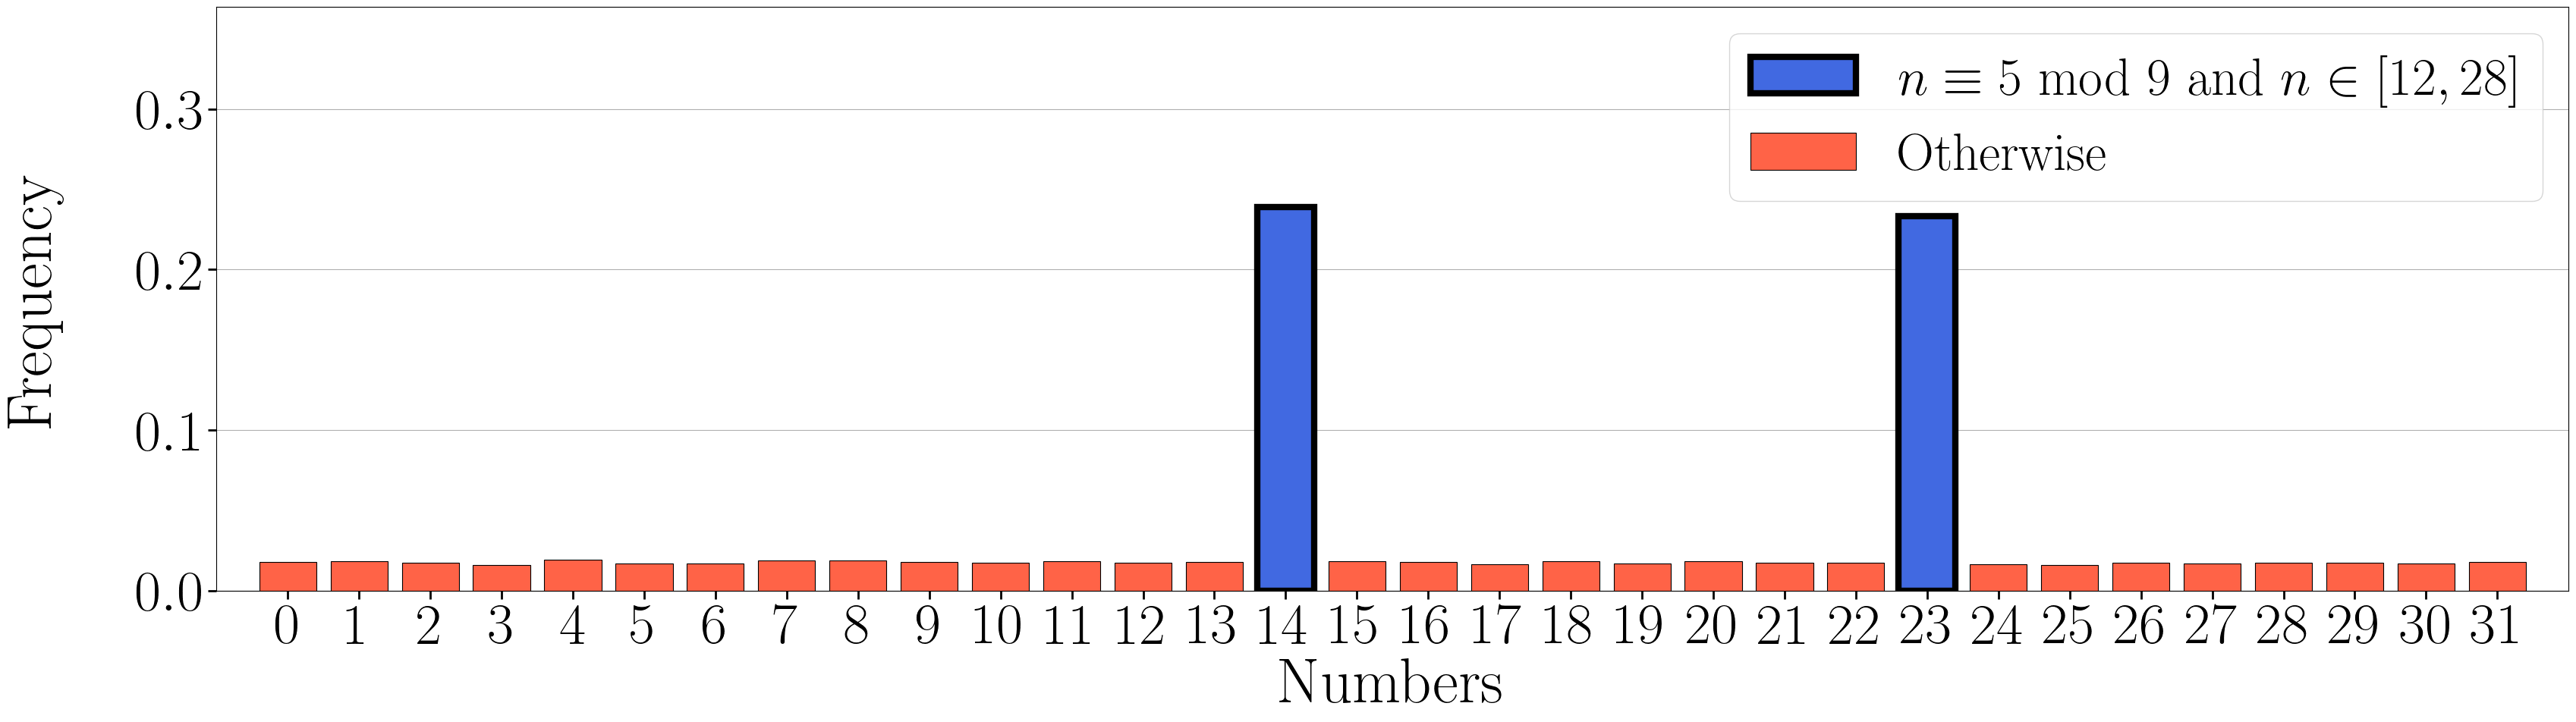

In [65]:
fig, ax = plt.subplots(1, 1, figsize=figsize_)


ax.bar(x_desired, [y_element/nshots for y_element in y_desired], zorder=3,
       edgecolor='k', label=legend_names[0], color = 'royalblue', linewidth=6)
ax.bar(x_undesired, [y_element/nshots for y_element in y_undesired], zorder=3,
       edgecolor='k', label=legend_names[1], color='tomato', linewidth=0.8)

ax.set_xticks(list(range(N)))

ax.tick_params(axis='x', labelsize=xticks_size)
ax.tick_params(axis='y', labelsize=yticks_size)

ax.set_xlabel(xlabel, fontsize=xlabel_size)
ax.set_ylabel(ylabel, fontsize=ylabel_size)


ax.yaxis.set_label_coords(ylabel_position[0], ylabel_position[1])

ax.grid(axis='y', zorder=0)    

ax.legend(fontsize=fontsize-10, loc='upper right')

ax.tick_params(width=2, size=8)

ax.set_xlim([-1, 32])

lims = ax.get_ylim()

ax.set_ylim(lims[0], 1.45*lims[1])

# plt.savefig(fname='plots_simulations/simulation_%d_K_lessthan_%d_w_%d_qubits.png'%(k, m, nqubits_input), bbox_inches='tight', dpi=200)
plt.savefig(fname=os.path.join(os.path.pardir, folder, filename), bbox_inches='tight', dpi=400)